In [1]:
from matplotlib import pyplot as plt
import numpy as np

# LOAD DATA 

In [2]:
with open('LAB1_25.TXT', 'r') as file:
    data = np.array([list(map(float, line.split())) for line in file])
time = data[:, 0] * 10**-6

# TASK 1

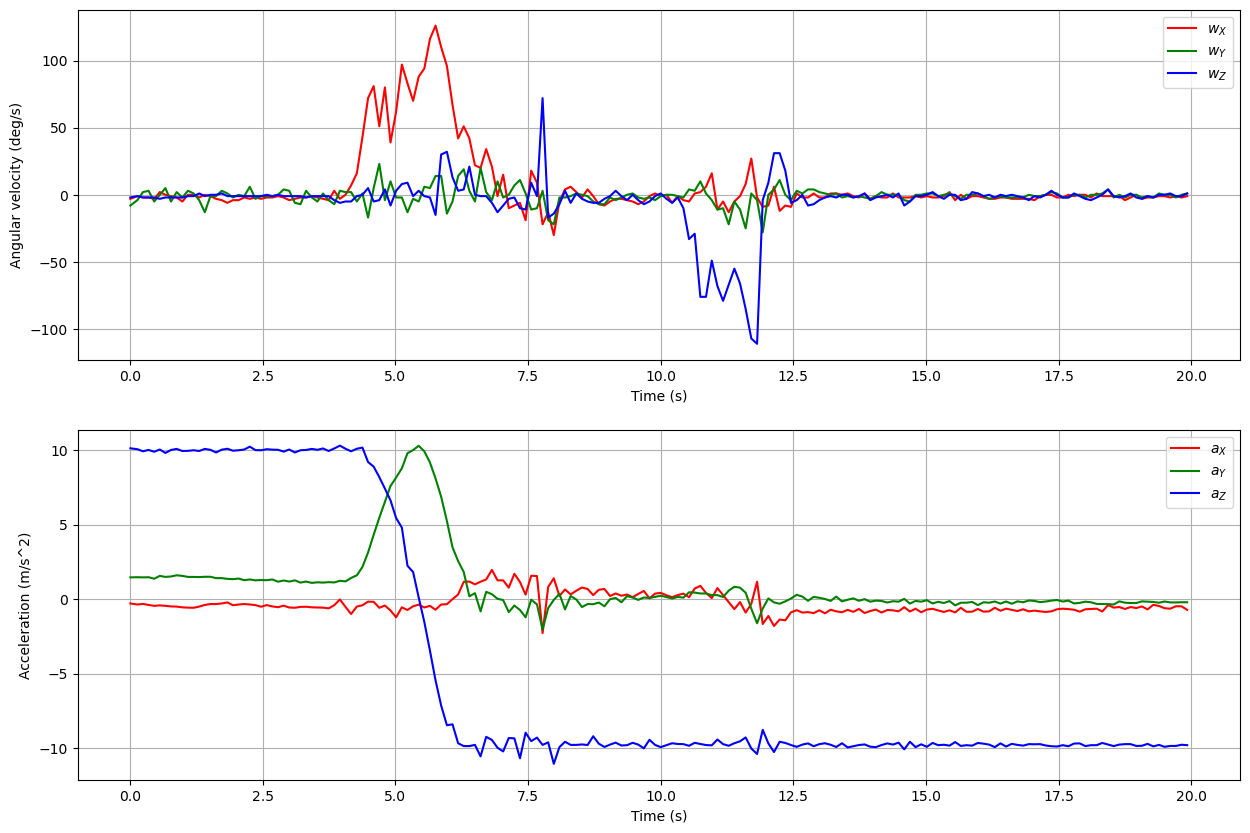

In [3]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
#accelerometer data(hundredths of meters per second squared)
acceleration = data[:, 1:4] * 0.01
#gyro-rate (tenths of degrees per second)
angular_velocity = data[:, 4:7] * 1

plt.plot(time,angular_velocity[:, 0], color='red')
plt.plot(time,angular_velocity[:, 1], color='green')
plt.plot(time,angular_velocity[:, 2], color='blue')
#Use latex for labels
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])


plt.grid()
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(time,acceleration[:, 0], color='red')
plt.plot(time,acceleration[:, 1], color='green')
plt.plot(time,acceleration[:, 2], color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.show()

In [4]:
#Measure the variance of the data
static_arm_time = time > 15
var_ang_vel = np.var(angular_velocity[static_arm_time], axis=0)
mask = (angular_velocity > 3 * var_ang_vel) | (angular_velocity < -3 * var_ang_vel)
angular_velocity = np.where(mask, angular_velocity, 0)
var_acceleration = np.var(acceleration[static_arm_time], axis=0)
mask = (acceleration > 3 * var_acceleration) | (acceleration < -3 * var_acceleration)
acceleration = np.where(mask, acceleration,0)


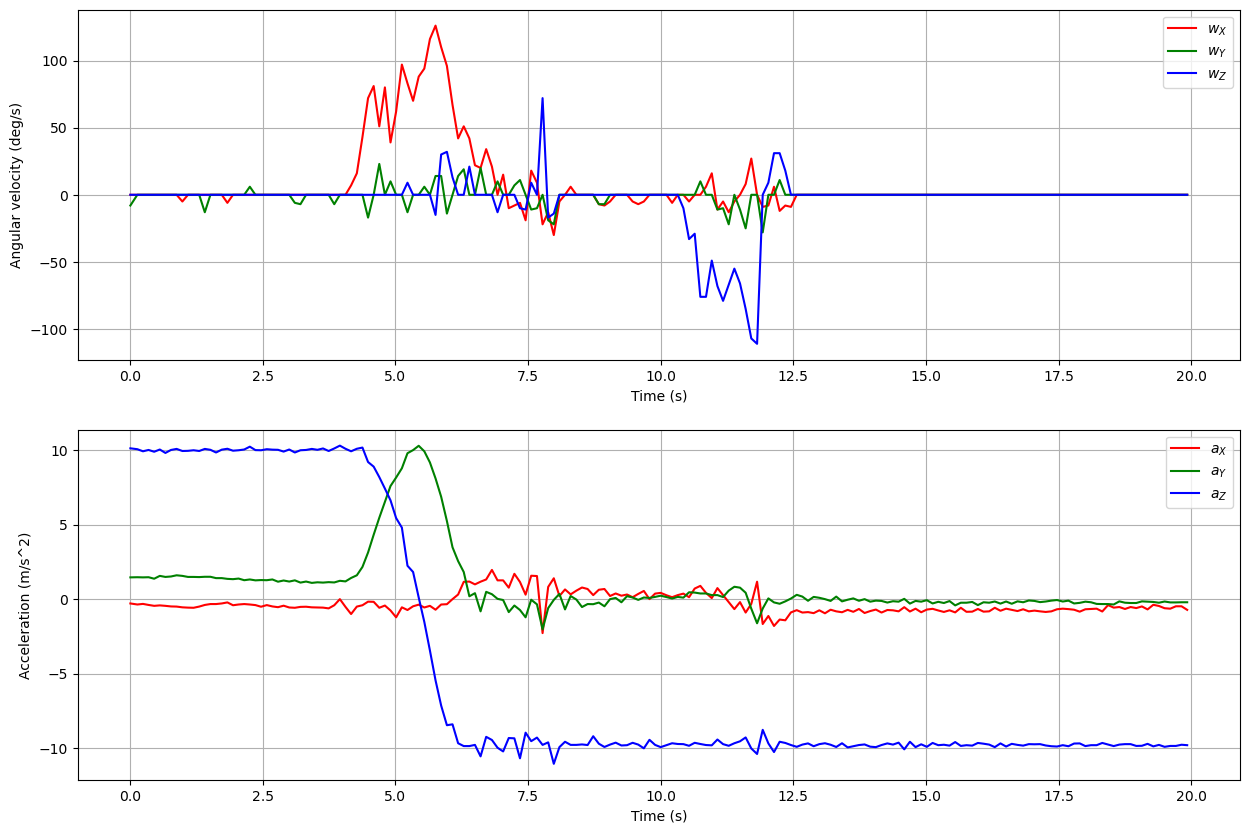

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)

plt.plot(time,angular_velocity[:, 0], color='red')
plt.plot(time,angular_velocity[:, 1], color='green')
plt.plot(time,angular_velocity[:, 2], color='blue')
#Use latex for labels
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])


plt.grid()
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(time,acceleration[:, 0], color='red')
plt.plot(time,acceleration[:, 1], color='green')
plt.plot(time,acceleration[:, 2], color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.show()

# TASK 2

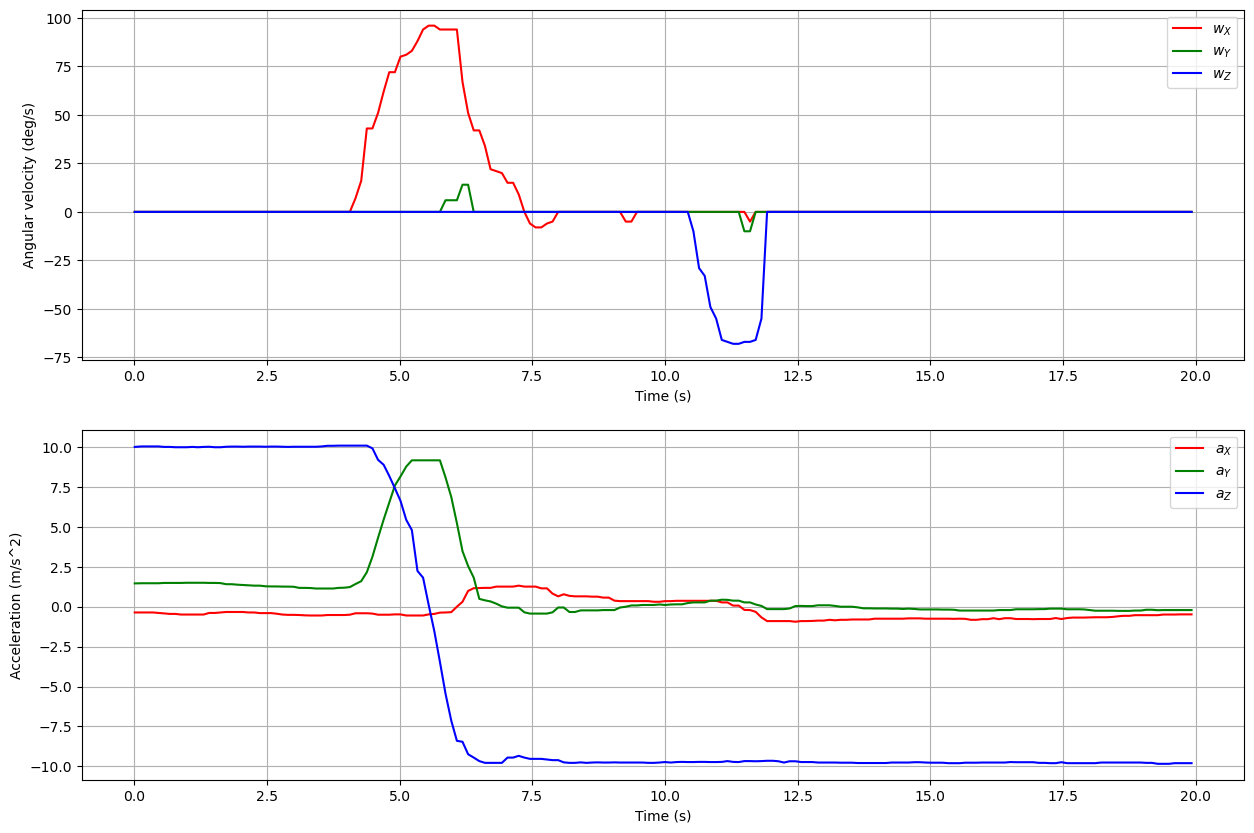

In [6]:
from scipy.ndimage import median_filter

def keep_only_moving(data, axis_moving_data):
    num_points, num_axis = data.shape
    for i in range(num_points):
        data_point = data[i]
        axis_moving = axis_moving_data[i]
        for j in range(num_axis):
            if j != axis_moving:
                data_point[j] = 0
    return data

filtered_ang_vel = median_filter(angular_velocity, size=(10,1))
filtered_acceleration = median_filter(acceleration, size=(10,1))
# axis_moving = np.argmax(filtered_ang_vel, axis=1)
# filtered_ang_vel_max = keep_only_moving(filtered_ang_vel, axis_moving)
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(time,filtered_ang_vel[:, 0], color='red')
plt.plot(time,filtered_ang_vel[:, 1], color='green')
plt.plot(time,filtered_ang_vel[:, 2], color = 'blue')
# plt.plot(time,filtered_ang_vel_max[:, 0], color='red', linestyle='--')
# plt.plot(time,filtered_ang_vel_max[:, 1], color='green', linestyle='--')
# plt.plot(time,filtered_ang_vel_max[:, 2], color='blue', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(time,filtered_acceleration[:, 0], color='red')
plt.plot(time,filtered_acceleration[:, 1], color='green')
plt.plot(time,filtered_acceleration[:, 2], color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.grid()
plt.show()


In [7]:
Initial_roll = 0
for i in range(39, 70):
    dt = time[i] - time[i-1]
    Initial_roll += filtered_ang_vel[i, 0] * dt
    # print(f'{Initial_roll:=}, {i=:}, {time[i]=:}, {filtered_ang_vel[i, 0]=:}, {dt=:}')
print(Initial_roll)

180.14211999999998


### Rolling window mean

In [8]:
# import pandas as pd
# # Create a time series
# ts = pd.DataFrame(angular_velocity)
# filtered_mean_angular_velocity_ts.rolling(window=5).mean()

# # Compute a rolling average with a window of size 3
# rolling_mean = ts.rolling(window=3).mean()
# filtered_ang_vel = me(angular_velocity, size=(10,1))
# filtered_acceleration = median_filter(acceleration, size=(10,1))
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# plt.plot(time,filtered_ang_vel[:, 0], color='red')
# plt.plot(time,filtered_ang_vel[:, 1], color='green')
# plt.plot(time,filtered_ang_vel[:, 2], color = 'blue')
# plt.xlabel('Time (s)')
# plt.ylabel('Angular velocity (deg/s)')
# plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])
# plt.grid()
# plt.subplot(2, 1, 2)
# plt.plot(time,filtered_acceleration[:, 0], color='red')
# plt.plot(time,filtered_acceleration[:, 1], color='green')
# plt.plot(time,filtered_acceleration[:, 2], color = 'blue')
# plt.xlabel('Time (s)')
# plt.ylabel('Acceleration (m/s^2)')
# plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
# plt.grid()
# plt.show()


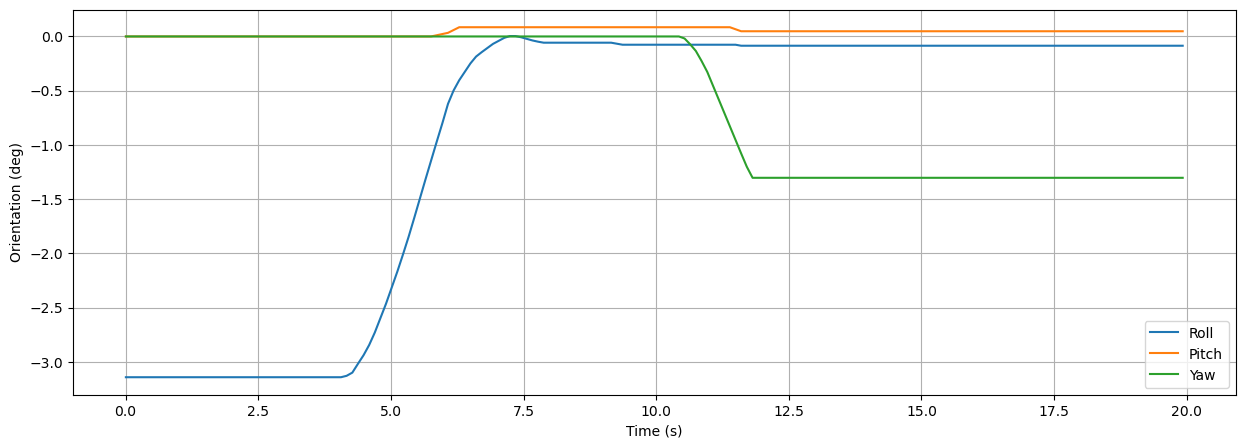

In [9]:
def normalize_angle(angle):
    for i in range(len(angle[-1])):
        angle[-1][i] = (angle[-1][i] + 180) % 360 - 180
    return angle

orientation = [[180,0,0]] #Initial orientation extracted by looking at the acceleration data (measuring the gravity acceleration at the beginning)
normalize_angle(orientation)
for i,ang_vel in enumerate(filtered_ang_vel[1:]):
    dt = time[i] - time[i-1]
    orientation.append(orientation[-1] + ang_vel * dt)
    normalize_angle(orientation)

orientation = np.radians(orientation)

plt.figure(figsize=(15, 5))
plt.plot(time, orientation)
plt.xlabel('Time (s)')
plt.ylabel('Orientation (deg)')
plt.legend(['Roll', 'Pitch', 'Yaw'])
plt.grid()


delta_orientation = [[0,0,0]] #Initial orientation extracted by looking at the acceleration data (measuring the gravity acceleration at the beginning)
normalize_angle(delta_orientation)
for i,ang_vel in enumerate(filtered_ang_vel[1:]):
    dt = time[i] - time[i-1]
    delta_orientation.append(ang_vel * dt)
    normalize_angle(delta_orientation)

delta_orientation = np.radians(delta_orientation)

In [10]:
def rotation_matrix(roll, pitch, yaw):
    """
    """
    c_yaw, s_yaw = np.cos(yaw), np.sin(yaw)  # cos(α), sin(α)
    c_pitch, s_pitch = np.cos(pitch), np.sin(pitch)  # cos(β), sin(β)
    c_roll, s_roll = np.cos(roll), np.sin(roll)  # cos(γ), sin(γ)
    
    # Rotation matrix computation
    R = np.array([
        [c_yaw * c_pitch, c_yaw * s_pitch * s_roll - s_yaw * c_roll, c_yaw * s_pitch * c_roll + s_yaw * s_roll],
        [s_yaw * c_pitch, s_yaw * s_pitch * s_roll + c_yaw * c_roll, s_yaw * s_pitch * c_roll - c_yaw * s_roll],
        [-s_pitch, c_pitch * s_roll, c_pitch * c_roll]
    ])
    
    return R

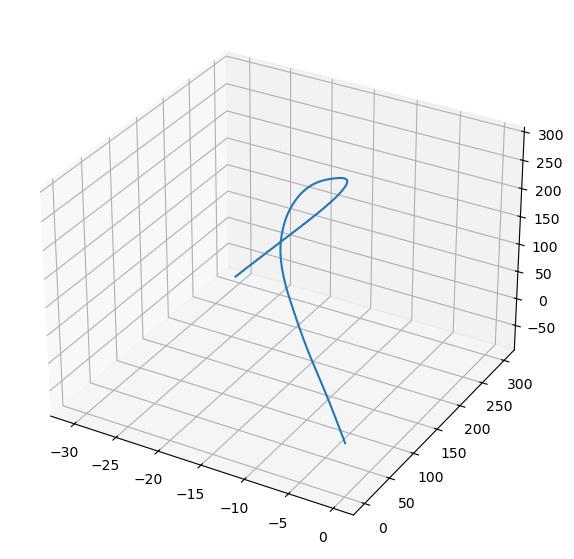

In [11]:
total_rotation = np.eye(3)  
t_prev = time[0]
gravity_world = np.array([0, 0, -9.81])
vel_prev = filtered_acceleration[0] * time[0]
position = [vel_prev*time[0]]
t_prev = 0
for t, ac in zip(time[1:], filtered_acceleration[1:]):
    dt = t - t_prev
    vel = vel_prev + ac*dt 
    position.append(position[-1] + vel*dt)
    vel_prev = vel
    t_prev = t
    
position = np.array(position)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the trajectory
ax.plot(position[:,0], position[:,1], position[:,2], label="Trajectory")
total_rotation = [np.eye(3)]
for t, delta in zip(time, delta_orientation):
    total_rotation.append(rotation_matrix(*delta) @ total_rotation[-1])

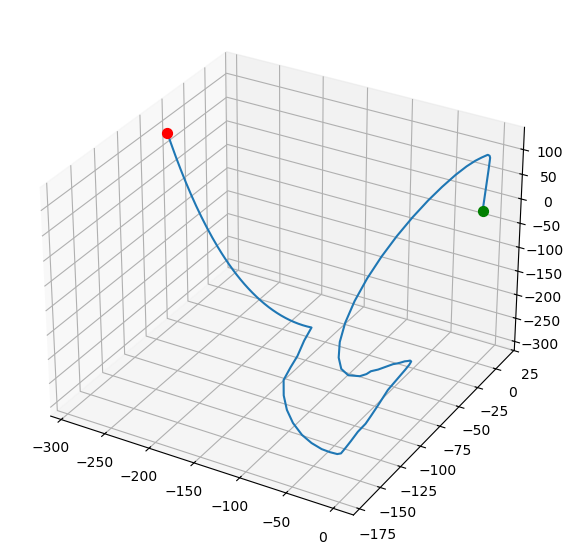

In [19]:
trajectory = []
for a,(pos, rot) in enumerate(zip(position[1:], total_rotation[1:]), 1):
    new_pos_world = rot @ pos
    trajectory.append(new_pos_world + gravity_world * (time[a]- time[a-1])**2 / 2)

trajectory = np.array(trajectory)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the trajectory
ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], label="Trajectory") 
ax.scatter(trajectory[0,0], trajectory[0,1], trajectory[0,2], color="green", label="Start", s=50)  # Start point
ax.scatter(trajectory[-1,0], trajectory[-1,1], trajectory[-1,2], color="red", label="End", s=50)  # End point

# Trajetória

In [13]:
def plot_circle(points):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    radius = 1
    # Plot the trajectory
    ax.plot(radius * np.sin(points[:,0])*np.cos(points[:,1]), np.sin(points[:,0])*np.sin(points[:,1]), np.cos(points[:,0]), label="Trajectory")
    ax.scatter(radius * np.sin(points[0,0])*np.cos(points[0,1]), np.sin(points[0,0])*np.sin(points[0,1]), np.cos(points[0,0]), color="green", label="Start", s=50)  # Start point
    ax.scatter(radius * np.sin(points[-1,0])*np.cos(points[-1,1]), np.sin(points[-1,0])*np.sin(points[-1,1]), np.cos(points[-1,0]), color="red", label="End", s=50)   # End point

    # Labels and legend
    ax.set_xlabel("X Position (m)")
    ax.set_ylabel("Y Position (m)")
    ax.set_zlabel("Z Position (m)")
    ax.set_title("3D Trajectory")
    ax.legend()
    
    plt.show()
    return radius * np.sin(points[:,0])*np.cos(points[:,1]), np.sin(points[:,0])*np.sin(points[:,1]), np.cos(points[:,0])

# TASK 3

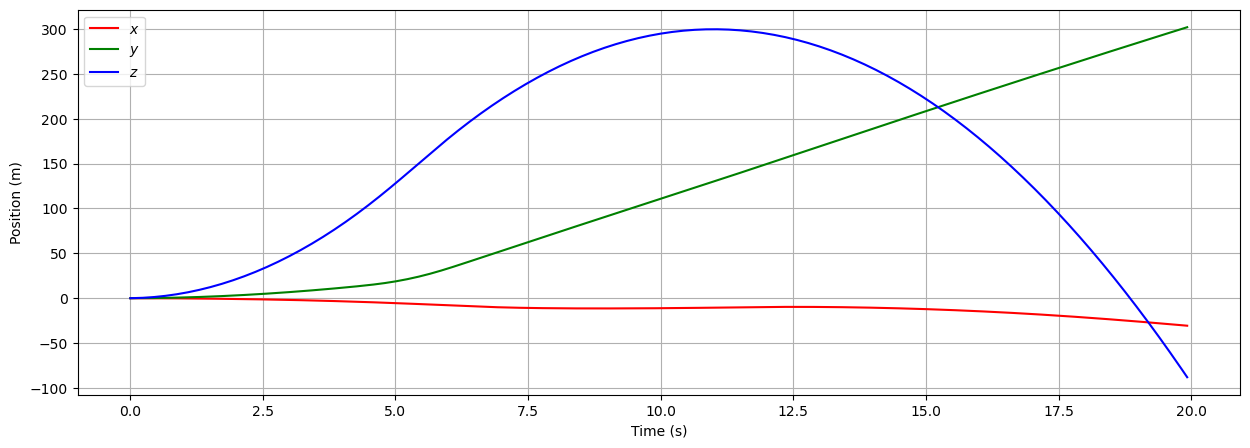

In [14]:
vel_prev = filtered_acceleration[0] * time[0]
position = [vel_prev*time[0]]
t_prev = 0
for t, ac in zip(time[1:], filtered_acceleration[1:]):
    dt = t - t_prev
    vel = vel_prev + ac*dt
    position.append(position[-1] + vel*dt)
    
    vel_prev = vel
    t_prev = t
    
    
position = np.array(position)
plt.figure(figsize=(15, 5))
plt.plot(time, position[:,0], color='red')
plt.plot(time,position[:,1], color='green')
plt.plot(time,position[:, 2], color='blue')
plt.legend(['$x$', '$y$', '$z$'])
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()


In [15]:
# Plot the trajectory
plot_trajectory(position)

NameError: name 'plot_trajectory' is not defined

# TASK 4

In [ ]:
#v1 = (teta1- teta0)/(t1-t0)

angvel_prev = filtered_ang_vel[0] * time[0]
positionAng = [angvel_prev*time[0]]
t_prev = 0
for t, av in zip(time[1:], filtered_ang_vel[1:]):
    dt = t - t_prev
    positionAngAux = positionAng[-1]+av*dt
    if positionAngAux[0] > 360:
        positionAngAux[0]-=360
    if positionAngAux[1] > 360:
        positionAngAux[1]-=360
    if positionAngAux[2] > 360:
        positionAngAux[2]-=360
    if positionAngAux[0] < -360:
        positionAngAux[0]+=360
    if positionAngAux[1] < -360:
        positionAngAux[1]+=360
    if positionAngAux[2] < -360:
        positionAngAux[2]+=360
    positionAng.append(positionAngAux)
    t_prev = t

positionAng = np.array(positionAng)
plt.figure(figsize=(15, 5))
plt.plot(time, positionAng[:,0], color='red')
plt.plot(time,positionAng[:,1], color='green')
plt.plot(time,positionAng[:, 2], color='blue')
plt.legend(['$teta1$', '$teta2$', '$teta3$'])
plt.xlabel('Time (s)')
plt.ylabel('Angle (º)')
plt.grid()

In [ ]:
from math import sqrt

def deg_to_rad(deg):
    return deg * np.pi / 180

x,y,z = plot_circle(deg_to_rad(positionAng))
for x1,y1,z1 in zip(x,y,z):
    print(sqrt(x1**2 + y1**2 + z1**2))
    